In [111]:
import pandas as pd 
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go

In [105]:
winners = pd.read_csv('nobel_winners.csv')
publications = pd.read_csv('nobel_winners_all_pubs.csv')

In [11]:
winners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   prize_year            969 non-null    int64 
 1   category              969 non-null    object
 2   prize                 969 non-null    object
 3   motivation            881 non-null    object
 4   prize_share           969 non-null    object
 5   laureate_id           969 non-null    int64 
 6   laureate_type         969 non-null    object
 7   full_name             969 non-null    object
 8   birth_date            938 non-null    object
 9   birth_city            941 non-null    object
 10  birth_country         943 non-null    object
 11  gender                943 non-null    object
 12  organization_name     722 non-null    object
 13  organization_city     716 non-null    object
 14  organization_country  716 non-null    object
 15  death_date            617 non-null    ob

In [13]:
publications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93394 entries, 0 to 93393
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   laureate_id             93394 non-null  int64  
 1   laureate_name           93394 non-null  object 
 2   prize_year              93394 non-null  int64  
 3   title                   93391 non-null  object 
 4   pub_year                93393 non-null  float64
 5   paper_id                93361 non-null  float64
 6   doi                     93196 non-null  object 
 7   journal                 92164 non-null  object 
 8   affiliation             75880 non-null  object 
 9   is_prize_winning_paper  93394 non-null  object 
 10  category                93394 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 7.8+ MB


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

def apply_theme_nobel(fig):
    fig.update_layout(
        font=dict(
            family="Times New Roman",
            size=12,
            color="black"
        ),
        title=dict(
            x=0.5,          
            xanchor='center',
            font=dict(size=14, family="Times New Roman", color="black"),
        ),
        legend=dict(
            orientation="h", 
            y=1.1,
            x=0.5,
            xanchor='center',
            font=dict(family="Times New Roman", size=10)
        ),
        plot_bgcolor='white',
        paper_bgcolor='white',
        margin=dict(t=80, b=50, l=60, r=40),
        xaxis=dict(
            showgrid=False,
            zeroline=False,
            showline=False,
            ticks='',
            title_font=dict(family="Times New Roman", size=12),
            tickfont=dict(family="Times New Roman", size=10),
        ),
        yaxis=dict(
            showgrid=False,
            zeroline=False,
            showline=False,
            ticks='',
            title_font=dict(family="Times New Roman", size=12),
            tickfont=dict(family="Times New Roman", size=10),
        )
    )
    return fig



Data Cleaning 

In [143]:
winners['birth_date'] = pd.to_datetime(winners['birth_date'], errors='coerce')
winners['death_date'] = pd.to_datetime(winners['death_date'], errors='coerce')
winners['birth_year'] = winners['birth_date'].dt.year
winners['age'] = winners['prize_year'] - winners['birth_year']
winners['age'] = winners['age'].fillna(0).astype(int)
winners[['full_name', 'prize_year', 'birth_date', 'birth_year', 'age']].head()

,full_name,prize_year,birth_date,birth_year,age
0,Jacobus Henricus van 't Hoff,1901,1852-08-30,1852.0,49
1,Sully Prudhomme,1901,1839-03-16,1839.0,62
2,Emil Adolf von Behring,1901,1854-03-15,1854.0,47
3,Jean Henry Dunant,1901,1828-05-08,1828.0,73
4,Frédéric Passy,1901,1822-05-20,1822.0,79


Data summary for Categories

In [19]:
category_summary = winners['category'].value_counts().reset_index()
category_summary.columns = ['Category', 'N']
category_summary['Percent'] = (category_summary['N'] / category_summary['N'].sum()) * 100
category_summary['Percent'] = category_summary['Percent'].round(2)
category_summary = category_summary.sort_values(by='Percent', ascending=False).reset_index(drop=True)
category_summary

,Category,N,Percent
0,Medicine,227,23.43
1,Physics,222,22.91
2,Chemistry,194,20.02
3,Peace,130,13.42
4,Literature,113,11.66
5,Economics,83,8.57


Data summary for Categories

In [21]:
prize_share_summary = winners['prize_share'].value_counts().reset_index()
prize_share_summary.columns = ['Prize Sharing', 'N']
prize_share_summary['Percent'] = (prize_share_summary['N'] / prize_share_summary['N'].sum()) * 100
prize_share_summary['Percent'] = prize_share_summary['Percent'].round(2)
prize_share_summary = prize_share_summary.sort_values(by='N', ascending=False).reset_index(drop=True)
prize_share_summary

,Prize Sharing,N,Percent
0,1/1,351,36.22
1,1/2,328,33.85
2,1/3,225,23.22
3,1/4,65,6.71


Data summary for Laureate Type

In [23]:
laureate_type_summary = winners['laureate_type'].value_counts().reset_index()
laureate_type_summary.columns = ['Laureate Type', 'N']
laureate_type_summary['Percent'] = (laureate_type_summary['N'] / laureate_type_summary['N'].sum()) * 100
laureate_type_summary['Percent'] = laureate_type_summary['Percent'].round(2)
laureate_type_summary = laureate_type_summary.sort_values(by='Percent', ascending=False).reset_index(drop=True)
laureate_type_summary

,Laureate Type,N,Percent
0,Individual,939,96.9
1,Organization,30,3.1


Data summary for Birth Country

In [27]:
birth_country_summary = winners['birth_country'].value_counts().reset_index()
birth_country_summary.columns = ['Birth Country', 'N']
birth_country_summary['Percent'] = (birth_country_summary['N'] / birth_country_summary['N'].sum()) * 100
birth_country_summary['Percent'] = birth_country_summary['Percent'].round(2)
birth_country_summary = birth_country_summary.sort_values(by='Percent', ascending=False).reset_index(drop=True)
birth_country_summary

,Birth Country,N,Percent
0,United States of America,276,29.27
1,United Kingdom,88,9.33
2,Germany,70,7.42
3,France,53,5.62
4,Sweden,30,3.18
...,...,...,...
116,Union of Soviet Socialist Republics (Belarus),1,0.11
117,Guadeloupe Island,1,0.11
118,Bulgaria,1,0.11
119,"Java, Dutch East Indies (Indonesia)",1,0.11


Data summary for Gender

In [29]:
gender_summary = winners['gender'].value_counts().reset_index()
gender_summary.columns = ['Gender', 'N']
gender_summary['Percent'] = (gender_summary['N'] / gender_summary['N'].sum()) * 100
gender_summary['Percent'] = gender_summary['Percent'].round(2)
gender_summary = gender_summary.sort_values(by='Percent', ascending=False).reset_index(drop=True)
gender_summary

,Gender,N,Percent
0,Male,893,94.7
1,Female,50,5.3


Data summary for Laureate Publication Categories

In [31]:
publications['category'] = publications['category'].str.lower()
pub_category_summary = publications['category'].value_counts().reset_index()
pub_category_summary.columns = ['Category', 'N']
pub_category_summary['Percent'] = (pub_category_summary['N'] / pub_category_summary['N'].sum()) * 100
pub_category_summary['Percent'] = pub_category_summary['Percent'].round(2)
pub_category_summary = pub_category_summary.sort_values(by='N', ascending=False).reset_index(drop=True)
pub_category_summary

,Category,N,Percent
0,chemistry,42657,45.67
1,medicine,29233,31.30
2,physics,21504,23.03


Data summary for Laureate Age Upon Awarding

In [35]:
age_data = winners['age'].dropna()
age_data = age_data[(age_data > 10) & (age_data <= 120)]
age_summary = {
    'Min': age_data.min(),
    'Max': age_data.max(),
    'Mean': round(age_data.mean(), 2),
    'Median': age_data.median(),
    'N': age_data.count()
}
age_summary_df = pd.DataFrame(age_summary, index=['Age'])
age_summary_df

,Min,Max,Mean,Median,N
Age,17,90,59.48,60.0,938


Distribution for Laureate Age Upon Awarding

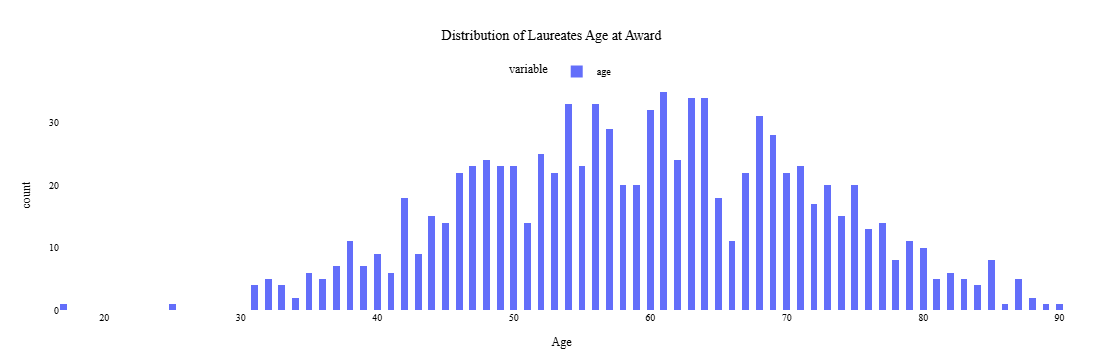

In [85]:
age_data = winners['age'][(winners['age'] > 10) & (winners['age'] < 100)].dropna()
fig = px.histogram(age_data, nbins=150, 
                   title='Distribution of Laureates Age at Award',
                   labels={'value':'Age', 'count':'Frequency'},
                   template='plotly_white')
fig=apply_theme_nobel(fig)
iplot(fig)

Distribution for Categories

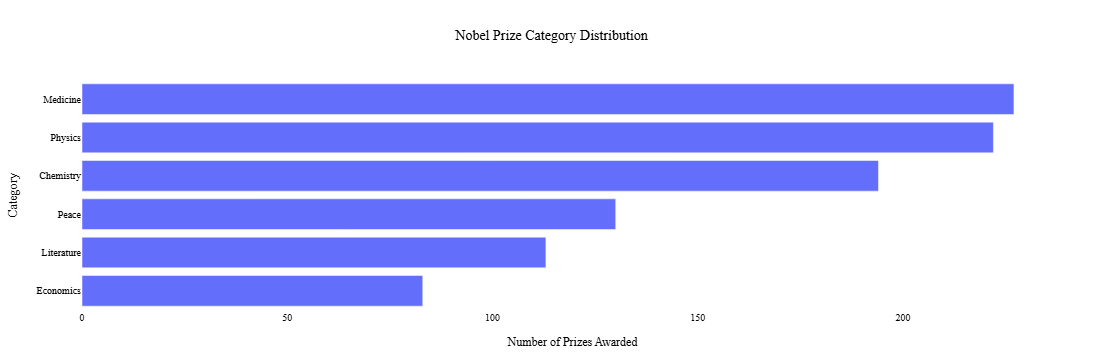

In [87]:
category_summary = winners['category'].value_counts().reset_index()
category_summary.columns = ['Category', 'Count']

fig = px.bar(category_summary.sort_values('Count', ascending=True), 
             x='Count', y='Category', orientation='h',
             title='Nobel Prize Category Distribution',
             labels={'Count': 'Number of Prizes Awarded', 'Category': 'Category'},
             template='plotly_white')
fig=apply_theme_nobel(fig)
iplot(fig)

Distribution for Prize Sharing

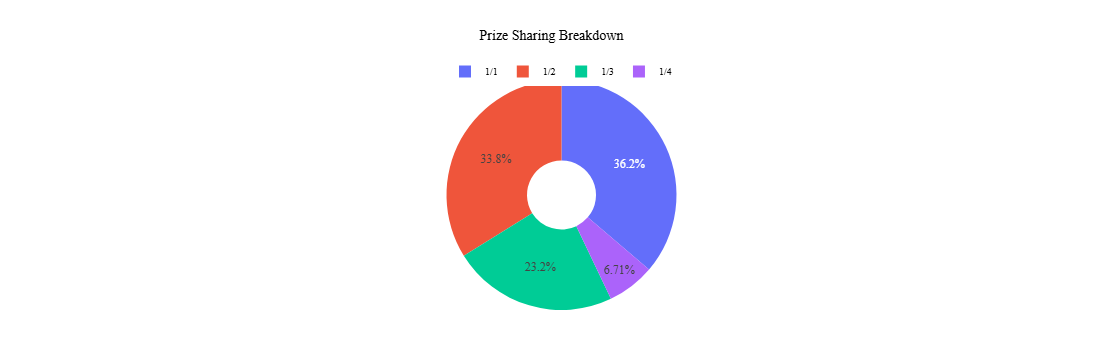

In [89]:
prize_share_summary = winners['prize_share'].value_counts().reset_index()
prize_share_summary.columns = ['Prize Sharing', 'Count']

fig = px.pie(prize_share_summary, 
             values='Count', names='Prize Sharing', 
             title='Prize Sharing Breakdown',
             template='plotly_white',
             hole=0.3)

fig=apply_theme_nobel(fig)
iplot(fig)

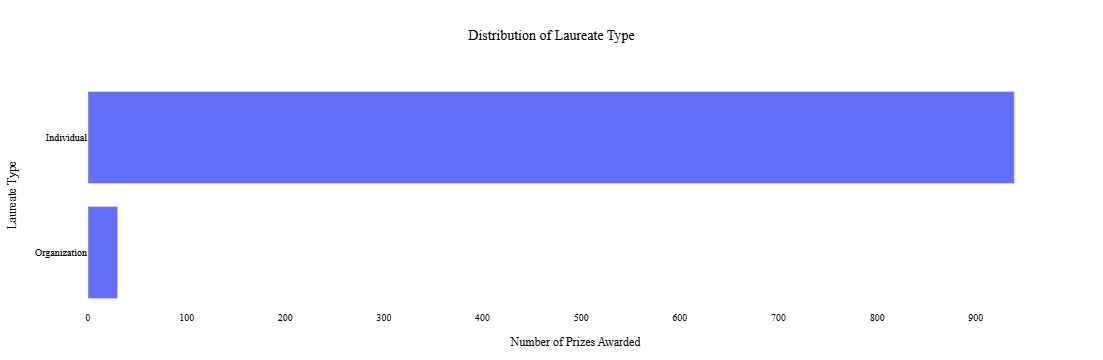

In [91]:
laureate_type_summary = winners['laureate_type'].value_counts().reset_index()
laureate_type_summary.columns = ['Laureate Type', 'Count']
fig = px.bar(laureate_type_summary.sort_values('Count', ascending=True),
             x='Count', y='Laureate Type', orientation='h',
             title='Distribution of Laureate Type',
             labels={'Count': 'Number of Prizes Awarded', 'Laureate Type': 'Laureate Type'})

fig=apply_theme_nobel(fig)
iplot(fig)

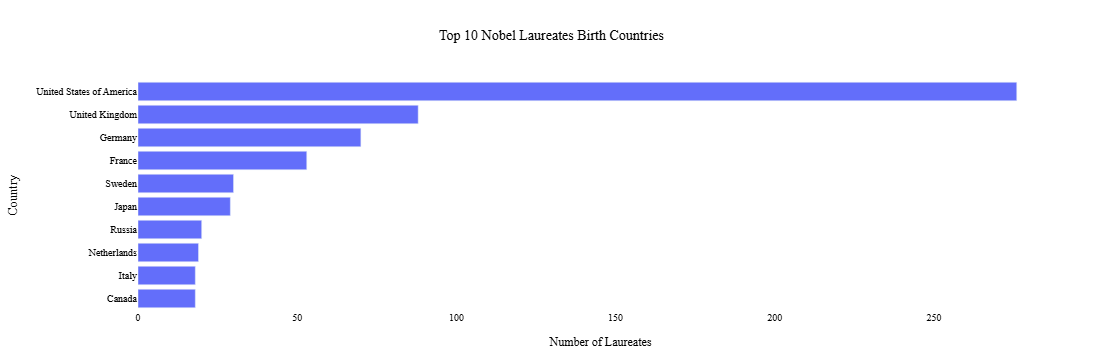

In [93]:
birth_country_summary = winners['birth_country'].value_counts().nlargest(10).reset_index()
birth_country_summary.columns = ['Birth Country', 'Count']
fig = px.bar(birth_country_summary.sort_values('Count', ascending=True),
             x='Count', y='Birth Country', orientation='h',
             title='Top 10 Nobel Laureates Birth Countries',
             labels={'Count': 'Number of Laureates', 'Birth Country': 'Country'})

fig = apply_theme_nobel(fig)

iplot(fig)

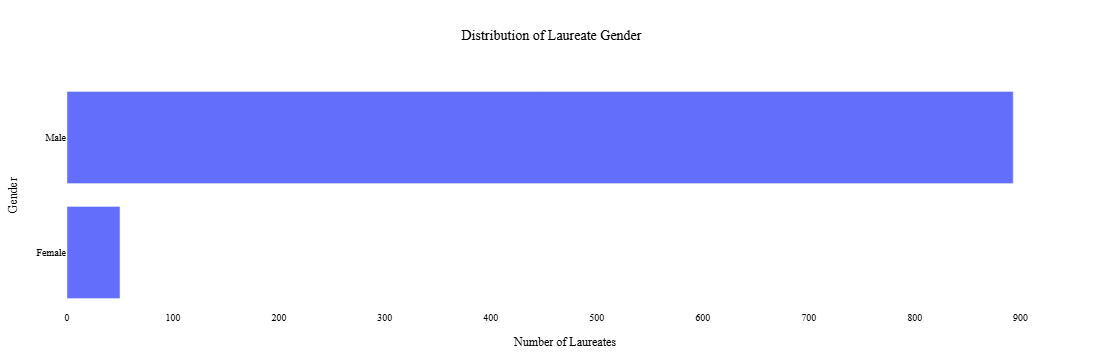

In [95]:
gender_summary = winners['gender'].value_counts().reset_index()
gender_summary.columns = ['Gender', 'Count']
fig = px.bar(gender_summary.sort_values('Count', ascending=True),
             x='Count', y='Gender', orientation='h',
             title='Distribution of Laureate Gender',
             labels={'Count': 'Number of Laureates', 'Gender': 'Gender'})

fig = apply_theme_nobel(fig)

iplot(fig)

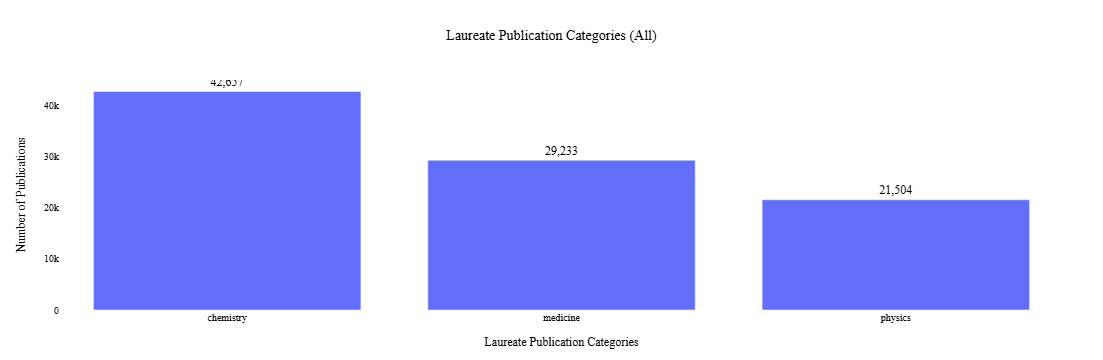

In [107]:
pub_summary = publications['category'].value_counts().reset_index()
pub_summary.columns = ['Category', 'Publications']

fig = px.bar(pub_summary,
             x='Category',
             y='Publications',
             title='Laureate Publication Categories',
             labels={'Category': 'Laureate Publication Categories', 'Publications': 'Number of Publications'},
             text='Publications',
             template='plotly_white')

fig = apply_theme_nobel(fig)
fig.update_traces(texttemplate='%{text:,}', textposition='outside')  # display counts with commas
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')

iplot(fig)

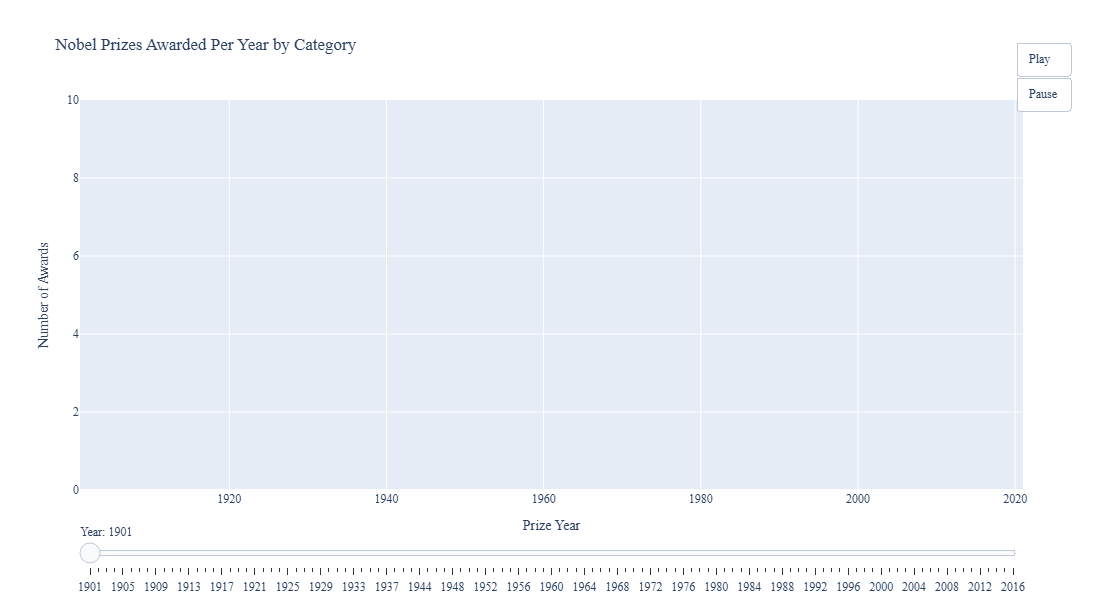

In [167]:

winners = winners.sort_values('prize_year')
years = sorted(winners['prize_year'].unique())
categories = sorted(winners['category'].unique())

counts = winners.groupby(['prize_year', 'category']).size().reset_index(name='count')
full_index = pd.MultiIndex.from_product([years, categories], names=['prize_year', 'category'])
full_df = counts.set_index(['prize_year', 'category']).reindex(full_index, fill_value=0).reset_index()

fig = go.Figure()

for cat in categories:
    fig.add_trace(go.Scatter(
        x=[],
        y=[],
        mode='lines+markers',
        name=cat
    ))

frames = []
for year in years:
    frame_data = []
    for cat in categories:
        df_cat = full_df[(full_df['category'] == cat) & (full_df['prize_year'] <= year)]
        frame_data.append(go.Scatter(
            x=df_cat['prize_year'],
            y=df_cat['count'],
            mode='lines+markers',
            name=cat
        ))
    frames.append(go.Frame(data=frame_data, name=str(year)))

fig.frames = frames
fig.update_layout(
    title='Nobel Prizes Awarded Per Year by Category',
    width=900,
    height=600,
    xaxis=dict(title='Prize Year', range=[years[0], 2021]),
    yaxis=dict(
        title='Number of Awards', range=[0,10]
    ),
    font=dict(family="Times New Roman", size=12),
    legend=dict(orientation='h', y=1.1, x=0.5, xanchor='center'),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        y=1.15,
        x=1.05,
        xanchor='right',
        yanchor='top',
        buttons=[
            dict(label='Play', method='animate',
                 args=[None, {
                     "frame": {"duration": 200, "redraw": True},
                     "fromcurrent": True,
                     "transition": {"duration": 150}
                 }]),
            dict(label='Pause', method='animate',
                 args=[[None], {
                     "frame": {"duration": 0, "redraw": False},
                     "mode": "immediate",
                     "transition": {"duration": 0}
                 }])
        ]
    )],
    sliders=[{
        "active": 0,
        "yanchor": "top",
        "xanchor": "left",
        "currentvalue": {"prefix": "Year: "},
        "pad": {"t": 30},
        "steps": [{
            "method": "animate",
            "args": [[str(year)], {"frame": {"duration": 300, "redraw": True},
                                   "mode": "immediate",
                                   "transition": {"duration": 150}}],
            "label": str(year)
        } for year in years]
    }]
)

fig.show()


In [169]:
fig.write_html("nobel_prize_animation.html")

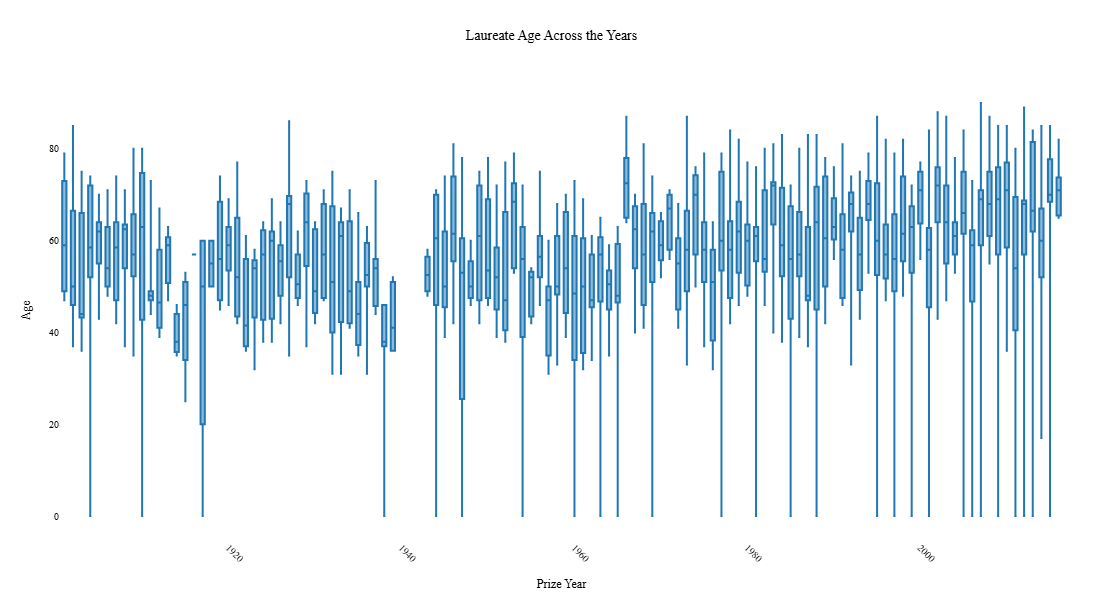

In [149]:

age_data = winners.dropna(subset=['age'])

fig = px.box(
    age_data,
    x='prize_year',
    y='age',
    points=False,
    title='Laureate Age Across the Years',
    labels={'prize_year': 'Prize Year', 'age': 'Age'},
    template='simple_white'
)

fig.update_layout(
    width=1000,
    height=600,
    font=dict(family='Times New Roman', size=12),
    xaxis=dict(tickangle=45, showgrid=False),
    yaxis=dict(nticks=6, title='Age'),
    showlegend=False
)

fig = apply_theme_nobel(fig)
iplot(fig)


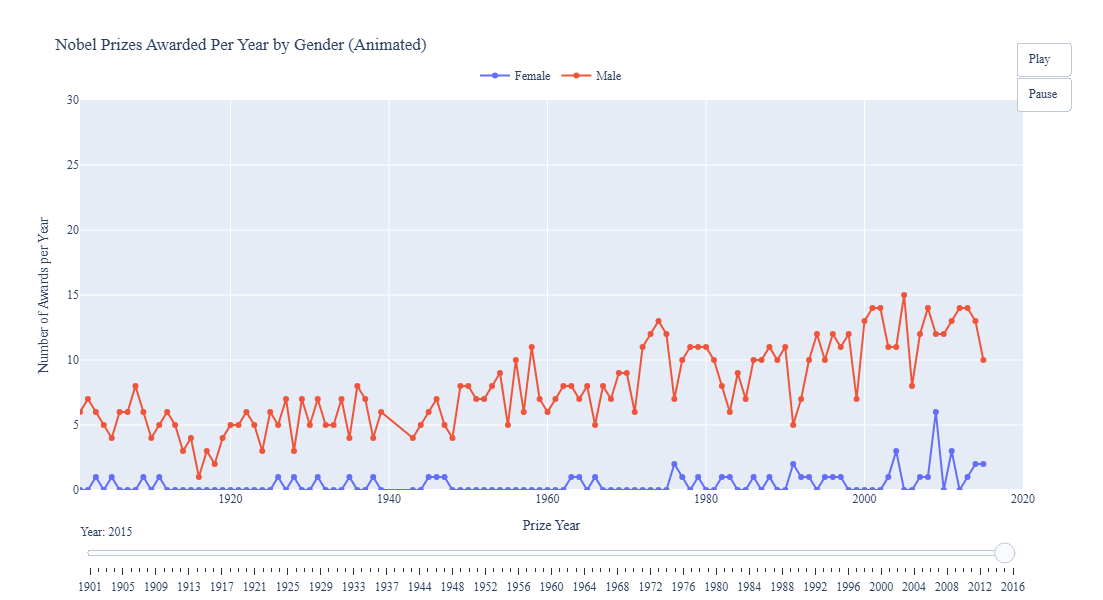

In [159]:

gender_data = winners.dropna(subset=['gender'])
gender_data = gender_data.groupby(['prize_year', 'gender']).size().reset_index(name='count')

# Create complete grid: all years × genders
years = sorted(gender_data['prize_year'].unique())
genders = sorted(gender_data['gender'].unique())
full_index = pd.MultiIndex.from_product([years, genders], names=['prize_year', 'gender'])

full_df = gender_data.set_index(['prize_year', 'gender']) \
                     .reindex(full_index, fill_value=0).reset_index()

# Sort and prepare
full_df = full_df.sort_values(['gender', 'prize_year'])

# Start figure with empty traces for each gender
fig = go.Figure()

for gender in genders:
    fig.add_trace(go.Scatter(
        x=[],
        y=[],
        mode='lines+markers',
        name=gender
    ))

# Create frames: each frame shows line grown up to that year
frames = []
for year in years:
    frame_data = []
    for gender in genders:
        df_g = full_df[(full_df['gender'] == gender) & (full_df['prize_year'] <= year)]
        frame_data.append(go.Scatter(
            x=df_g['prize_year'],
            y=df_g['count'],
            mode='lines+markers',
            name=gender
        ))
    frames.append(go.Frame(data=frame_data, name=str(year)))

fig.frames = frames

# Layout and animation
fig.update_layout(
    title='Nobel Prizes Awarded Per Year by Gender (Animated)',
    width=900,
    height=600,
    xaxis=dict(title='Prize Year', range=[min(years), 2020]),
    yaxis=dict(title='Number of Awards per Year',range=[0,30]),
    font=dict(family='Times New Roman', size=12),
    legend=dict(orientation='h', y=1.1, x=0.5, xanchor='center'),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        y=1.15,
        x=1.05,
        xanchor='right',
        yanchor='top',
        buttons=[
            dict(label='Play', method='animate',
                 args=[None, {
                     "frame": {"duration": 300, "redraw": True},
                     "fromcurrent": True,
                     "transition": {"duration": 150}
                 }]),
            dict(label='Pause', method='animate',
                 args=[[None], {
                     "frame": {"duration": 0, "redraw": False},
                     "mode": "immediate",
                     "transition": {"duration": 0}
                 }])
        ]
    )],
    sliders=[{
        "active": 0,
        "yanchor": "top",
        "xanchor": "left",
        "currentvalue": {"prefix": "Year: "},
        "pad": {"t": 30},
        "steps": [{
            "method": "animate",
            "args": [[str(year)], {"frame": {"duration": 300, "redraw": True},
                                   "mode": "immediate",
                                   "transition": {"duration": 150}}],
            "label": str(year)
        } for year in years]
    }]
)

fig.show()


In [161]:
fig.write_html("nobel_prize_per_gender_year.html")

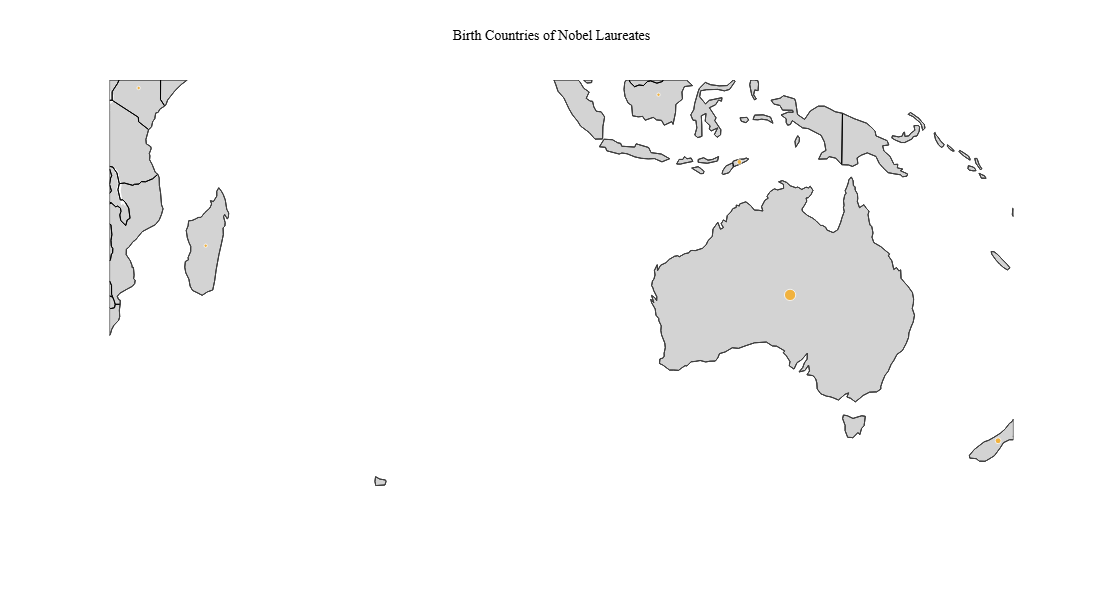

In [163]:
country_counts = winners['birth_country'].value_counts().reset_index()
country_counts.columns = ['birth_country', 'count']
fig = px.scatter_geo(
    country_counts,
    locations="birth_country",
    locationmode="country names",  
    size="count",
    projection="natural earth",
    color_discrete_sequence=["orange"],
    hover_name="birth_country",
    title="Birth Countries of Nobel Laureates",
    size_max=40
)
fig.update_layout(
    width=1000,
    height=600,
    font=dict(family='Times New Roman', size=12),
    geo=dict(
        showland=True,
        landcolor="lightgray",
        showcountries=True,
        countrycolor="black",
        projection_scale=1,
        showframe=False,
        showcoastlines=True,
    ),
    legend=dict(title=''),
)

fig = apply_theme_nobel(fig)

iplot(fig)


In [165]:
fig.write_html("nobel_prize_geo.html")